# HTCondor JobSubmission Demo

## Submiting a test job

In [1]:
from htcondor_utilities import run_testjob, htcondor_status

In [2]:
run_testjob(submit=False)

A test case with the following parameters:
Ehtdata:  torus.out0.05992.h5,torus.out0.05993.h5,torus.out0.05994.h5,torus.out0.05995.h5,torus.out0.05996.h5
Rhigh-Ratio:  10:100:10
Theta-Viewing-Angle:  30,50,60,70,80,90
Rho0-Density-Normalization:  4.266338570441294e+17




total jobs:  300
ready to submit


In [3]:
import matplotlib.pyplot as plt
import time
from datetime import datetime

In [7]:
status = htcondor_status()

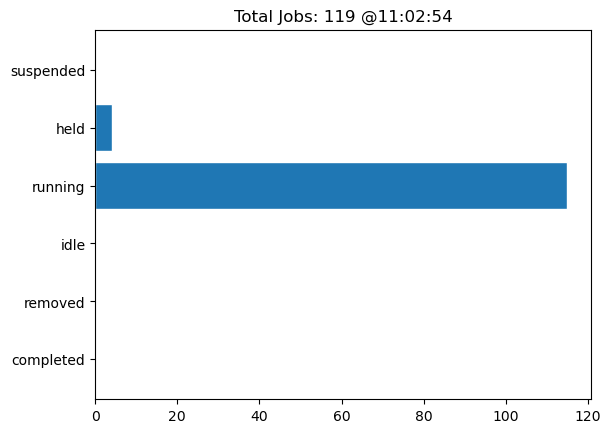

In [ ]:
# plot
now = datetime.now()
current_time = now.strftime("%H:%M:%S")

fig, ax = plt.subplots()

x = list(status.keys())[1:]
y = list(status.values())[1:]
barplot = ax.barh(x, y, edgecolor="white")
ax.set_title(f"Total Jobs: {status['jobs']} @{current_time}")
plt.show()

# looping
for _ in range(50):
   
    # updating the value of x and y
    status = htcondor_status()
    y = list(status.values())[1:]
    for rect, h in zip(barplot, y):
        rect.set_height(h)
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    ax.set_title(f"Total Jobs: {status['jobs']} @{current_time}")
    # re-drawing the figure
    fig.canvas.draw()
     
    # to flush the GUI events
    fig.canvas.flush_events()
    time.sleep(5)

In [6]:
status

{'jobs': 124,
 'completed': 0,
 'removed': 0,
 'idle': 0,
 'running': 120,
 'held': 4,
 'suspended': 0}